In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
#data = pd.read_csv("Scores_CMG.csv")
data =pd.read_csv('Scores_CMG.csv', encoding='utf8', engine='python')
data.head()

,Unnamed: 0,Searchterm,User,Date,Tweet,Retweets,Subnum,Sentimentscore
0,0,Chipotle,NaN,2015-01-01,Craving chipotle but what else is new,1,NaN,0.0000
1,1,Chipotle,NaN,2015-01-01,Spending my evening watching vampire diaries a...,0,NaN,0.0000
2,2,Chipotle,NaN,2015-01-01,I want chipotle,0,NaN,0.0772
3,3,Chipotle,NaN,2015-01-01,WE JUST DROVE ALL THE WAY TO CHIPOTLE AND IT I...,0,NaN,0.0000
4,4,Chipotle,NaN,2015-01-01,"Chipotle, Noodles & Co, and Chick Fil A are al...",0,NaN,0.0000


In [13]:
data = data.drop(['Searchterm', 'User', 'Date', 'Retweets', 'Subnum', 'Sentimentscore'], axis = 1)

In [15]:
data = data.astype(str)
data["labels"] = ""
data.loc[data['Tweet'].str.contains('http'), 'labels'] = '1'

In [16]:
data.rename(columns = {'Tweet' : 'text'}, inplace = True)

In [17]:
data['label'] = data['labels'].map({'1': 1, '': 0})
data.drop(['labels'], axis = 1, inplace = True)
data.head()

,Unnamed: 0,text,label
0,0,Craving chipotle but what else is new,0
1,1,Spending my evening watching vampire diaries a...,0
2,2,I want chipotle,0
3,3,WE JUST DROVE ALL THE WAY TO CHIPOTLE AND IT I...,0
4,4,"Chipotle, Noodles & Co, and Chick Fil A are al...",0


In [18]:
data = data.rename(columns ={"label":"target"})
data.head()

,Unnamed: 0,text,target
0,0,Craving chipotle but what else is new,0
1,1,Spending my evening watching vampire diaries a...,0
2,2,I want chipotle,0
3,3,WE JUST DROVE ALL THE WAY TO CHIPOTLE AND IT I...,0
4,4,"Chipotle, Noodles & Co, and Chick Fil A are al...",0


In [19]:
data.target.value_counts()

0    316470
1     45190
Name: target, dtype: int64

In [20]:
data.groupby('target').describe()

Unnamed: 0                         text          \
            count  unique     top freq   count  unique   
target                                                   
0          316470  316470   96231    1  316470  277666   
1           45190   45190  264635    1   45190   39986   

                                                                 
                                                      top  freq  
target                                                           
0                                         I want chipotle  3406  
1       I just checked in @ ChipotleTweets with  mPLAC...   889

Text(0.5, 1.0, 'Distribution of Spam and Ham')

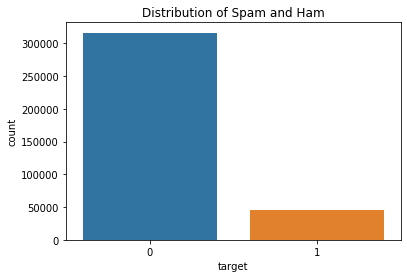

In [21]:
sns.countplot(x = "target", data = data)
data.loc[:, 'target'].value_counts()
plt.title('Distribution of Spam and Ham')

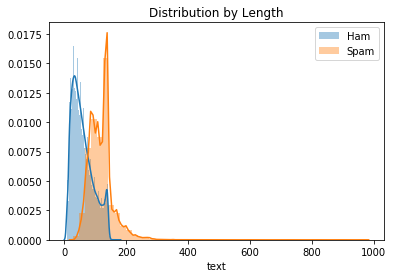

In [22]:
ham =data[data['target'] == 0]['text'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['target'] == 1]['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

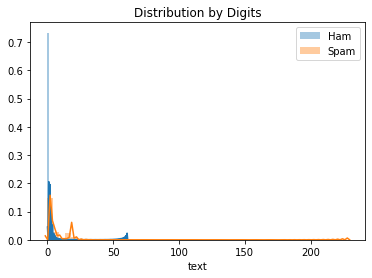

In [23]:
ham1 = data[data['target'] == 0]['text'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = data[data['target'] == 1]['text'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend()

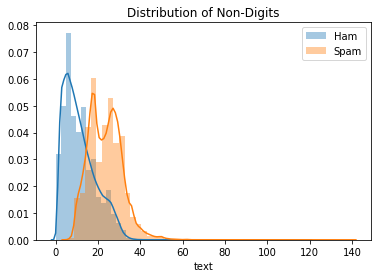

In [24]:
ham2 = data[data['target'] == 0]['text'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = data[data['target'] == 1]['text'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()

In [25]:
count1 = Counter(" ".join(data[data['target']==0]["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['target']==1]["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

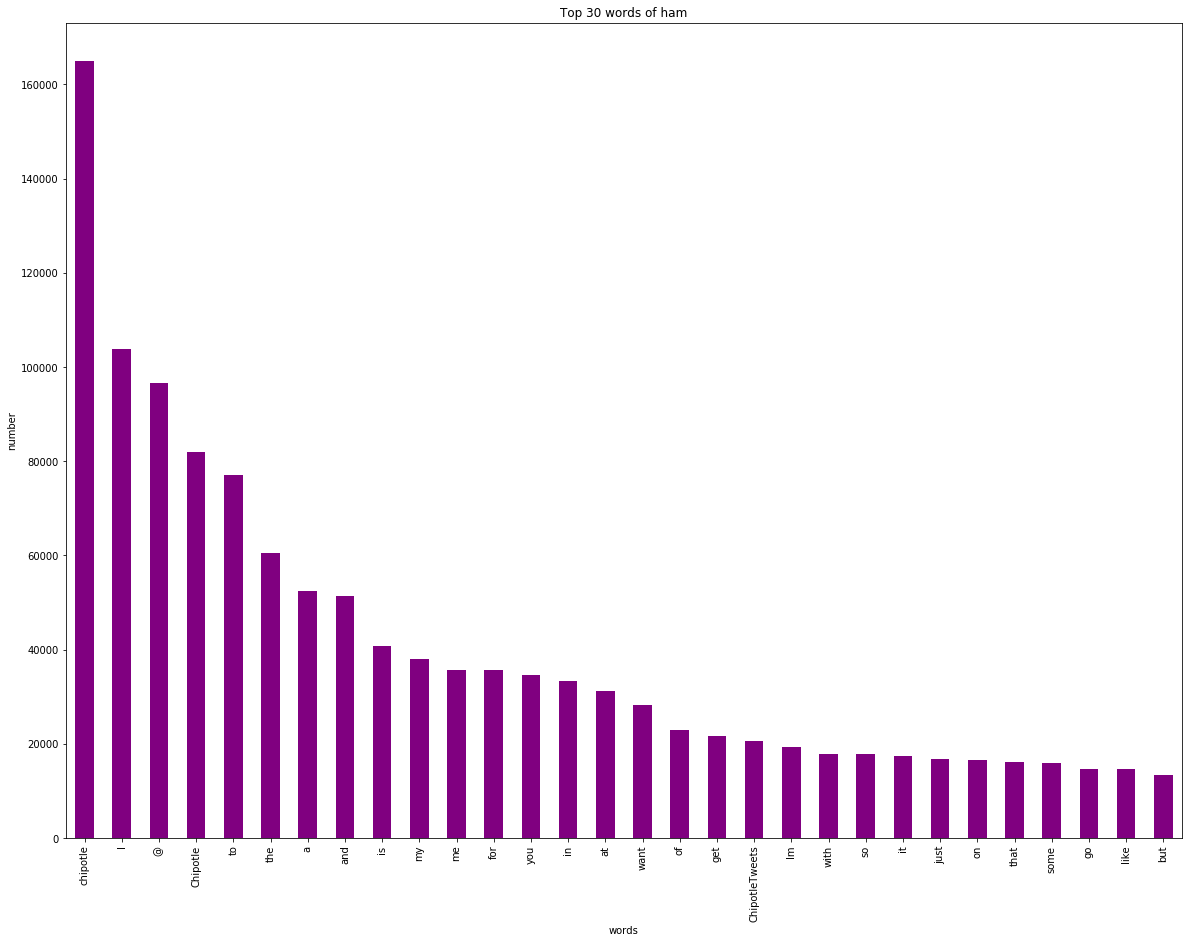

In [26]:
data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

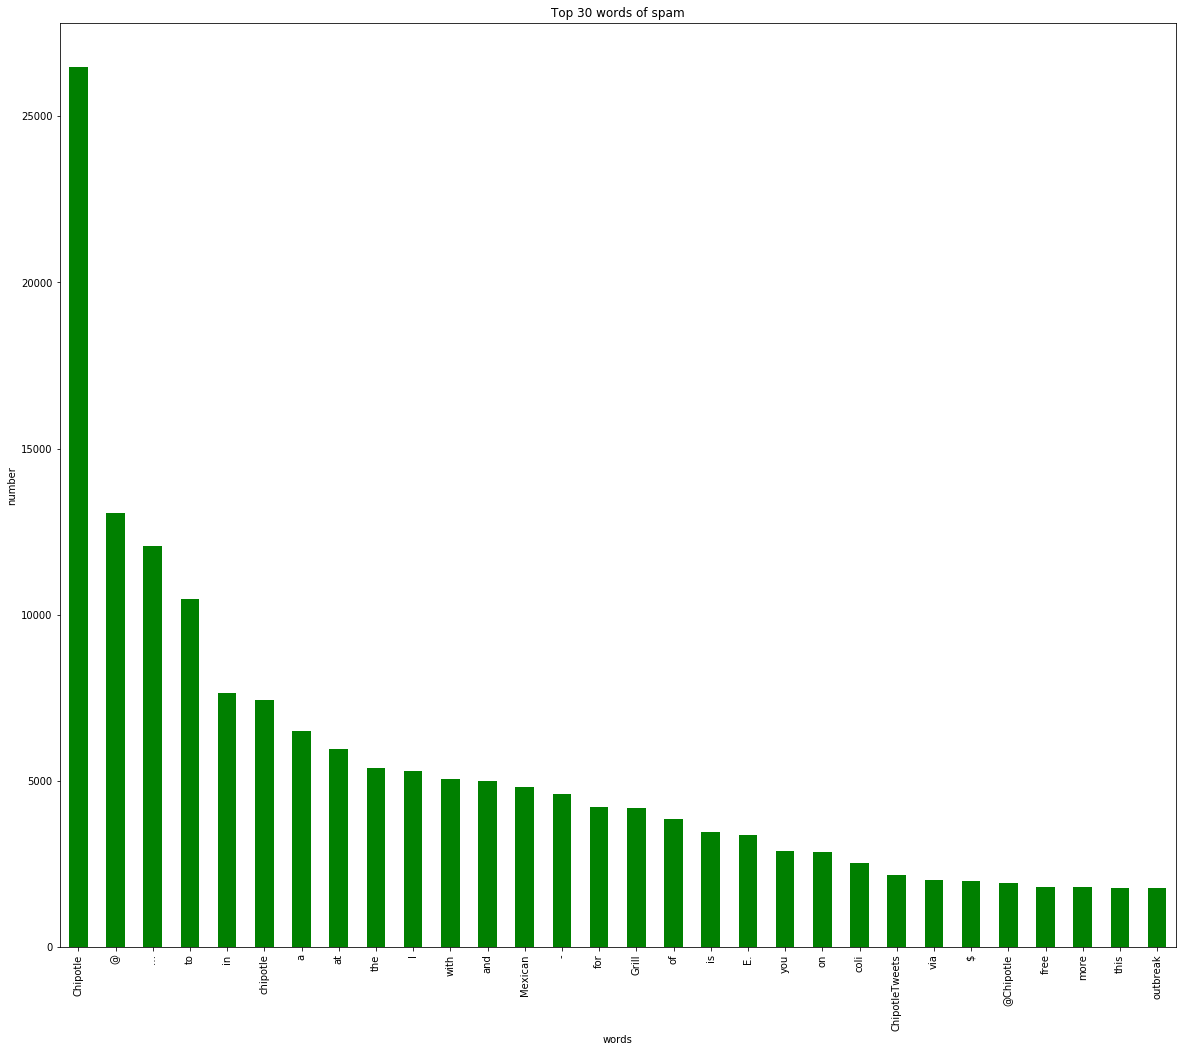

In [27]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  253162
X_test:  108498
y_train:  253162
y_test:  108498


In [ ]:
corpus = []
for i in range(0, 361660):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

In [ ]:
X_train_cv = cv.transform(X_train)
X_train_cv

In [ ]:
X_test_cv = cv.transform(X_test)
X_test_cv

In [ ]:
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

In [ ]:
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)

y_knc = knc.predict(X_test_cv)
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc)) 

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test))     

In [ ]:
etc = ExtraTreesClassifier(n_estimators=37, random_state=252)
etc.fit(X_train_cv,y_train)
y_etc = etc.predict(X_test_cv)
print('Extra Tree Accuracy_score: ',accuracy_score(y_test,y_etc))
print('Extra Tree confusion_matrix: ', confusion_matrix(y_etc, y_test)) 

In [ ]:
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test)) 

In [ ]:
abc = AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train_cv,y_train)
y_abc = abc.predict(X_test_cv)
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abc))
print('AdaBoost confusion_matrix: ', confusion_matrix(y_abc, y_test)) 

In [ ]:
bc = BaggingClassifier(n_estimators=9, random_state=252)
bc.fit(X_train_cv,y_train)
y_bc = bc.predict(X_test_cv)
print('Bagging Accuracy_score: ',accuracy_score(y_test,y_bc))
print('Bagging confusion_matrix: ', confusion_matrix(y_bc, y_test)) 